In [3]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-paper')
plt.rcParams["patch.force_edgecolor"] = True

In [4]:
file_BKG = up.open("radioactivity_userfile_7days.root")
file_IBD = up.open('ibd_userfile_7days.root')

dataset_IBD = file_IBD['TRec'].arrays(library = 'np')
dataset_BKG = file_BKG['TRec'].arrays(library = 'np')

Dataset è un DICT di NUMPY ARRAY

In [5]:
print(dataset_IBD["m_QEn"].shape)
print(dataset_BKG["m_QEn"].shape)

print(dataset_BKG["m_QEn"].shape[0]+dataset_IBD["m_QEn"].shape[0])

(704,)
(61870091,)
61870795


# Here some try

In [6]:
print([i for i in (1,2) if i == 1])
  

[1]


In [7]:
a = np.array([[1, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=1)

array([[1, 4, 5, 6]])

In [8]:
def combine_dict(d1, d2):
    combined = {}
    for k in set(d1.keys()) | set(d2.keys()):
        if k in d1 and k in d2 and isinstance(d1[k], np.ndarray) and isinstance(d2[k], np.ndarray):
            combined[k] = np.concatenate([d1[k], d2[k]])
        elif k in d1:
            combined[k] = d1[k]
        else:
            combined[k] = d2[k]
    
    provenienza = np.concatenate([np.full_like(d1.get(k, []), 1), np.full_like(d2.get(k, []), 0)])
    return {**combined, 'provenienza': provenienza}

#Prova dict 
dict1 = {'t': np.array([1,2,3]), 
         'E': np.array([3,4,5])}

dict2 = {'t': np.array([4,3,1]), 
         'E': np.array([5,2,2])}

combine_dict(dict1,dict2)

{'t': array([1, 2, 3, 4, 3, 1]),
 'E': array([3, 4, 5, 5, 2, 2]),
 'provenienza': array([1, 1, 1, 0, 0, 0])}

In [21]:
dict3 = {
    'dict1': dict1,
    'dict2': dict2
}
print(dict3) #Non va bene

{'dict1': {'t': array([1, 2, 3]), 'E': array([3, 4, 5])}, 'dict2': {'t': array([4, 3, 1]), 'E': array([5, 2, 2])}}


In [9]:
combine_dict(dataset_IBD,dataset_BKG)["m_QEn"].shape

(61870795,)

In [10]:
all_data = combine_dict(dataset_IBD,dataset_BKG)

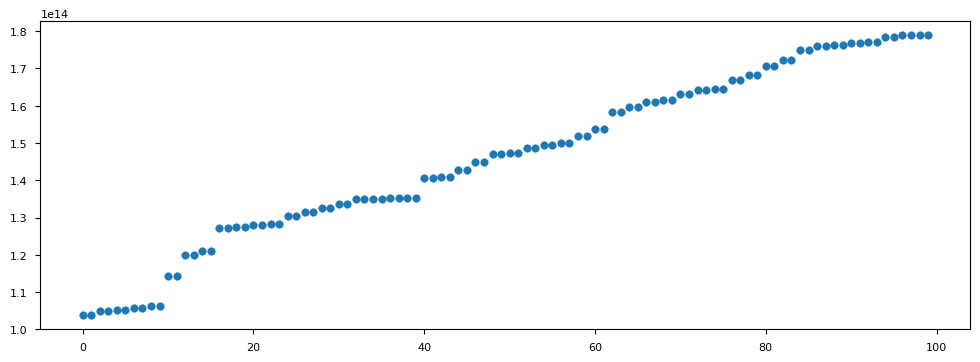

In [11]:
fig, ax = plt.subplots(figsize= (12,4))
ax.scatter(np.arange(100), all_data['m_triggerT'][100:200])

### Now I'll sort the data in temporal order

In [17]:
# Define a dictionary with some data
data = {
    'apple': {'color': 'red', 'price': 0.5},
    'banana': {'color': 'yellow', 'price': 0.25},
    'orange': {'color': 'orange', 'price': 0.4}
}

# Sort the dictionary by price
data = dict(sorted(data.items(), key=lambda x: x[1]['price']))
# Print the sorted dictionary
print(data)

{'banana': {'color': 'yellow', 'price': 0.25}, 'orange': {'color': 'orange', 'price': 0.4}, 'apple': {'color': 'red', 'price': 0.5}}


In [19]:

print(all_data)

{'m_QEn': array([2.4861238 , 2.3886237 , 5.7404804 , ..., 0.15170474, 0.8863203 ,
       1.399674  ], dtype=float32), 'recx': array([-6546.7075, -5635.7627, 13160.146 , ..., 10355.489 ,  4516.547 ,
        -304.768 ], dtype=float32), 'recy': array([ 12444.845 ,  11995.087 ,   5150.4067, ...,   6396.1426,
       -16283.133 ,  16600.729 ], dtype=float32), 'm_triggerT': array([7.37522900e+11, 7.37523153e+11, 1.05118890e+12, ...,
       6.04799982e+14, 6.04799998e+14, 6.04799999e+14]), 'recz': array([-10109.446 , -10101.866 ,   7890.3755, ...,   8448.533 ,
        -4145.55  ,   5200.7827], dtype=float32), 'provenienza': array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)}


In [22]:
all_data = dict(sorted(all_data.items(), key=lambda x: x['m_triggerT']))

TypeError: tuple indices must be integers or slices, not str